In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
from auxPlots import selectColor, xSecTest
from aux import getInfo, getLHEevents, getDistributions


pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Reading files
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/*/*.npz'))
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/sm/*/*.npz'))
data = []
data_sm = []
#Loading the distributions
for f in files + sm_files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        data_sm.append(aux)
    else:
        data.append(aux)

data = sorted(data, key=lambda d: d['mass_params'][0])
print(data_sm[2]['process'])
print(data[4]['deltaPhi'], data[5]['model'])

$p p \to t \bar{t}$
[3.14159265 3.14159265 3.14159265 ... 3.14159265 3.14159265 3.14159265] EFT


In [3]:
print(data[0]['mass_params'])
xSecTest(data + data_sm, True)

[200. 190.]
EFT $g g \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.448410520 sum of weights = 0.448410524 
EFT $q q \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.411134550 sum of weights = 0.411134551 
1-loop UV $g g \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.957700000 sum of weights = 0.957700000 
1-loop UV $q q \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.438900000 sum of weights = 0.438900000 
EFT $g g \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.199104380 sum of weights = 0.199104381 
EFT $q q \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.183055000 sum of weights = 0.183055003 
1-loop UV $g g \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.405000000 sum of weights = 0.405000000 
1-loop UV $q q \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.250900000 sum of weights = 0.250900000 
EFT $g g \to t \bar{t}$  mPsiT: 400.0, mSDM:

In [4]:
 for d in data:
    print(d['mass_params'][0], d['model'], d['process'], d['nevents'])

200.0 EFT $g g \to t \bar{t}$ 100000
200.0 EFT $q q \to t \bar{t}$ 100000
200.0 1-loop UV $g g \to t \bar{t}$ 51527
200.0 1-loop UV $q q \to t \bar{t}$ 138105
300.0 EFT $g g \to t \bar{t}$ 100000
300.0 EFT $q q \to t \bar{t}$ 100000
300.0 1-loop UV $g g \to t \bar{t}$ 51431
300.0 1-loop UV $q q \to t \bar{t}$ 60318
400.0 EFT $g g \to t \bar{t}$ 100000
400.0 EFT $q q \to t \bar{t}$ 100000
400.0 1-loop UV $g g \to t \bar{t}$ 51484
400.0 1-loop UV $q q \to t \bar{t}$ 51674
500.0 EFT $g g \to t \bar{t}$ 100000
500.0 EFT $q q \to t \bar{t}$ 100000
500.0 1-loop UV $g g \to t \bar{t}$ 51501
500.0 1-loop UV $q q \to t \bar{t}$ 43016
600.0 EFT $g g \to t \bar{t}$ 100000
600.0 EFT $q q \to t \bar{t}$ 100000
600.0 1-loop UV $g g \to t \bar{t}$ 51438
600.0 1-loop UV $q q \to t \bar{t}$ 51595
700.0 EFT $g g \to t \bar{t}$ 100000
700.0 EFT $q q \to t \bar{t}$ 100000
700.0 1-loop UV $g g \to t \bar{t}$ 51442
700.0 1-loop UV $q q \to t \bar{t}$ 60159
800.0 EFT $g g \to t \bar{t}$ 100000
800.0 EFT $q q

In [5]:
print(pare)


NameError: name 'pare' is not defined

# Invariant mass $qq\to t\bar{t}$

/tmp/ipykernel_17484/260092775.py:67: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))


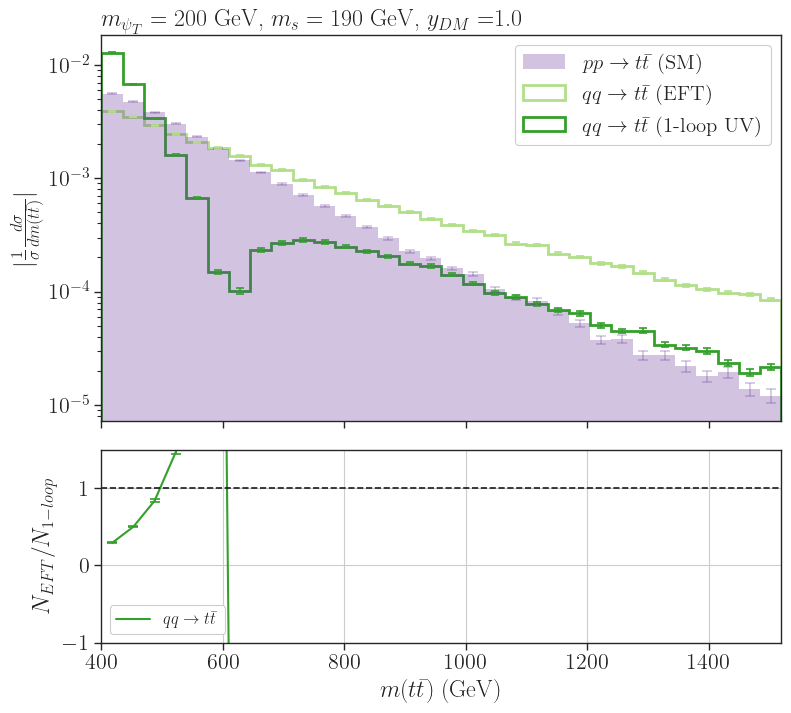

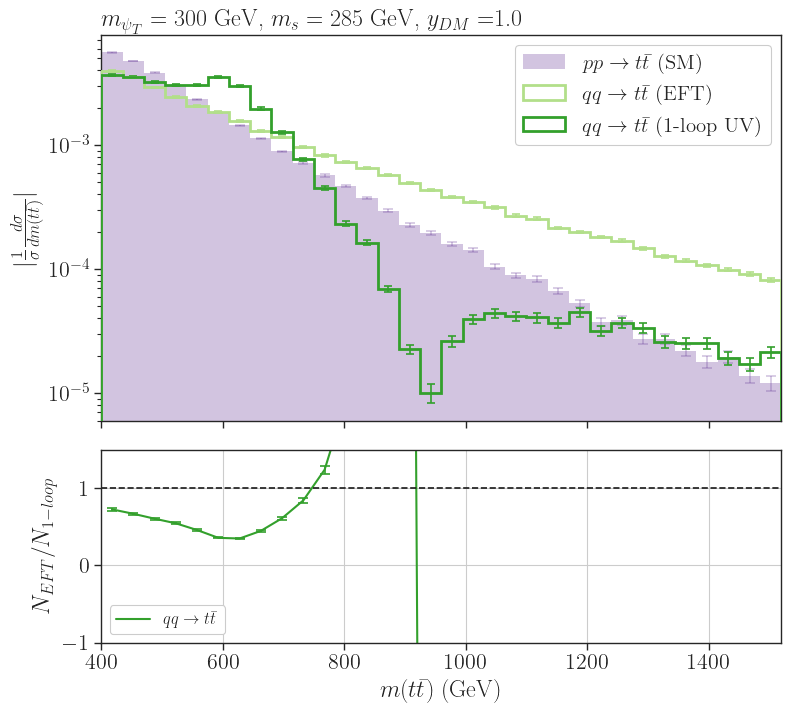

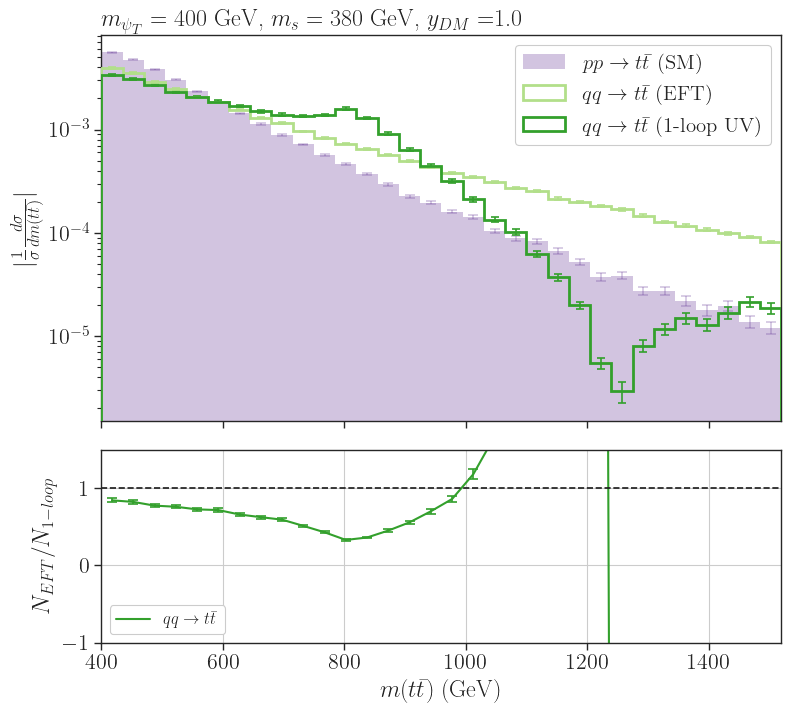

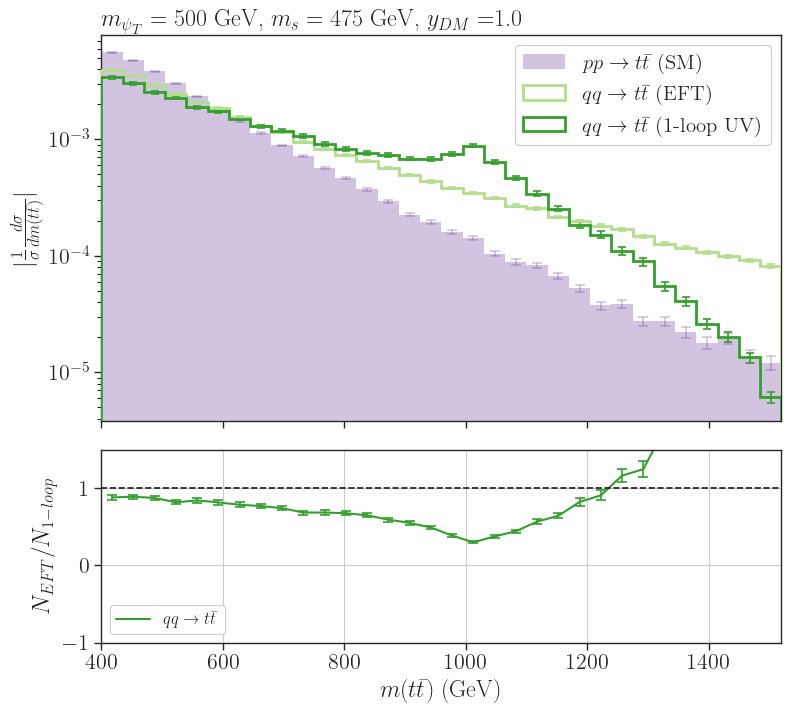

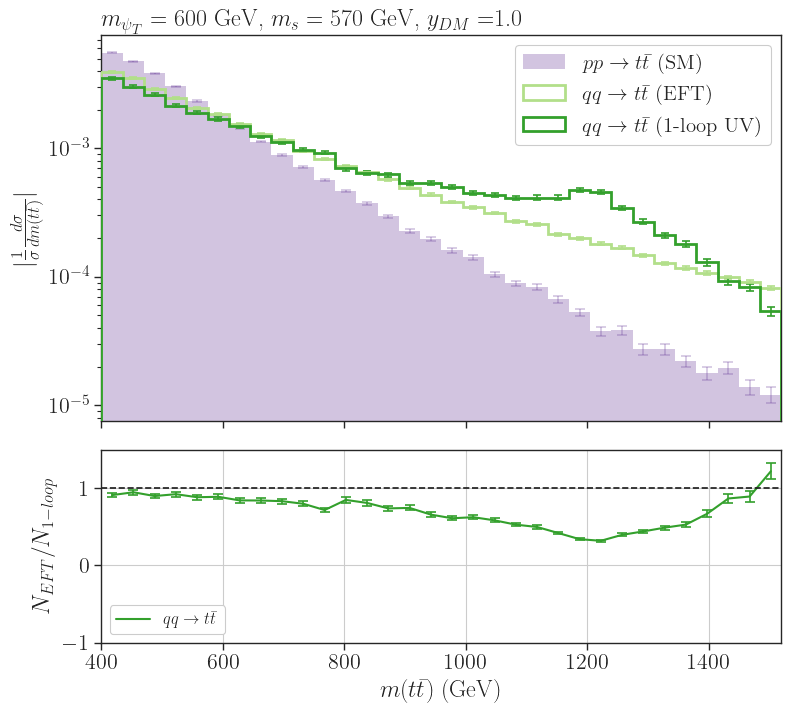

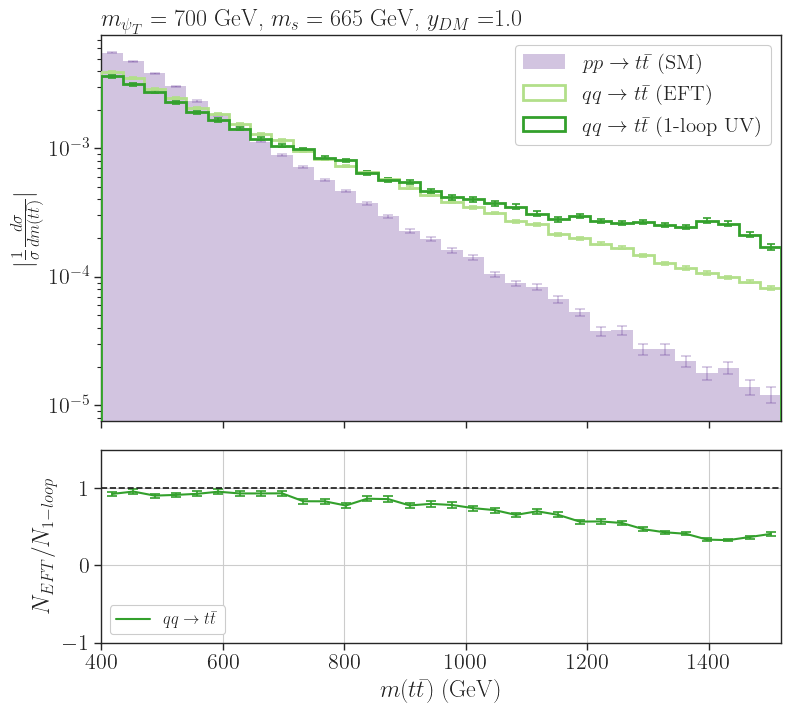

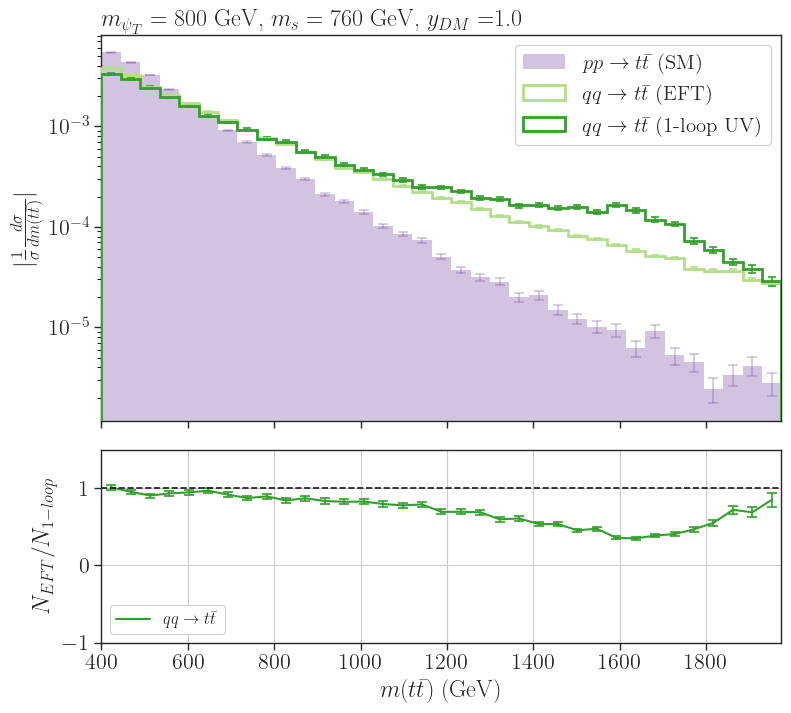

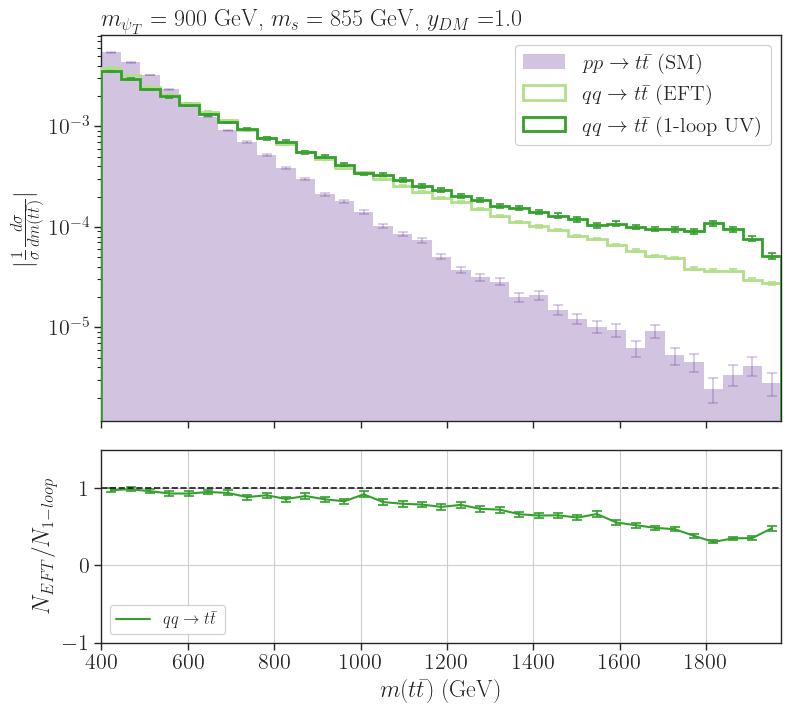

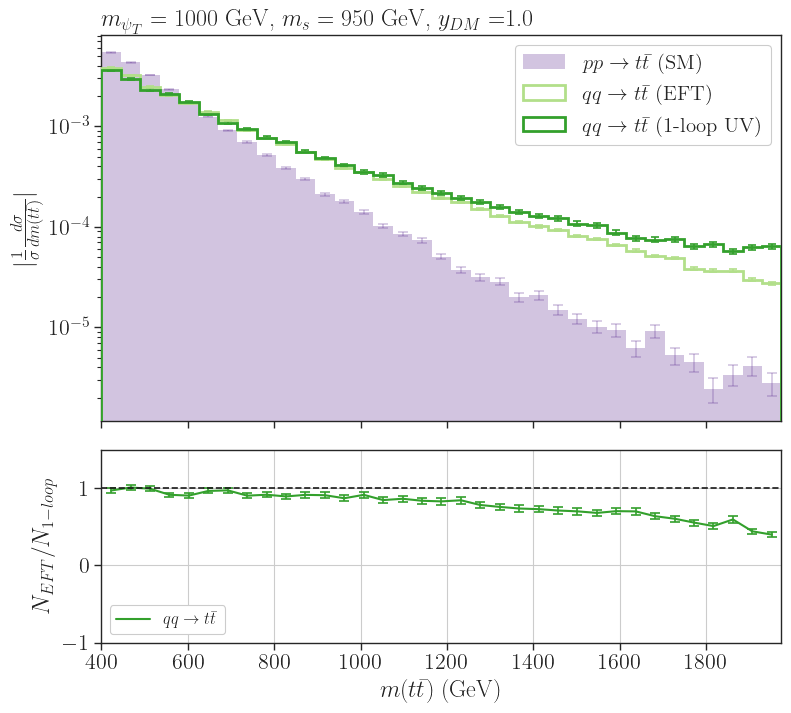

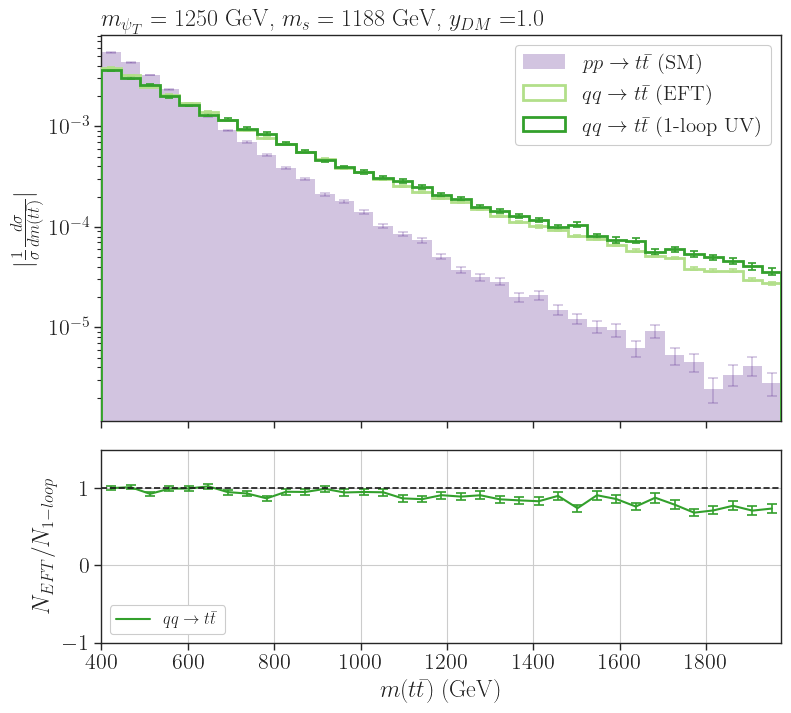

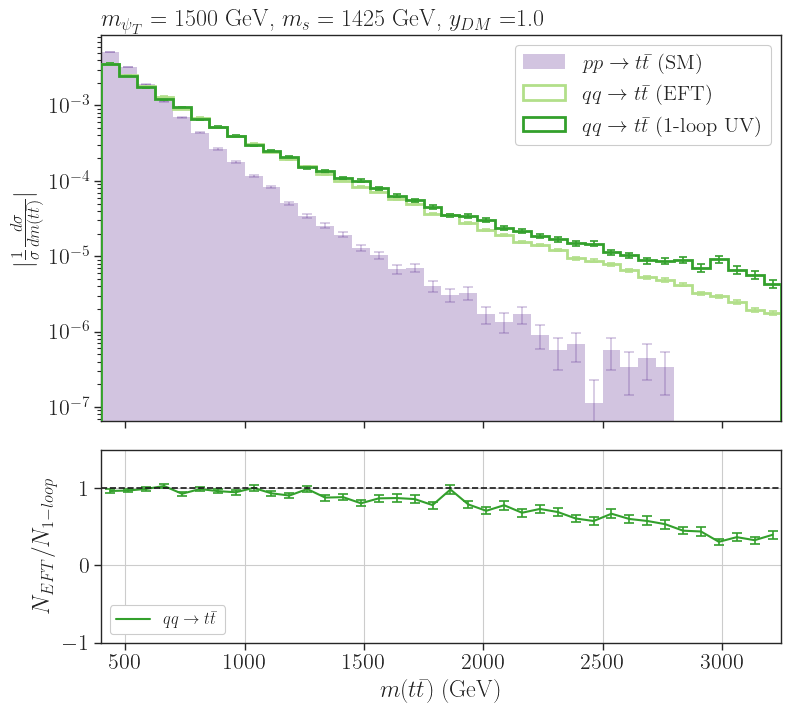

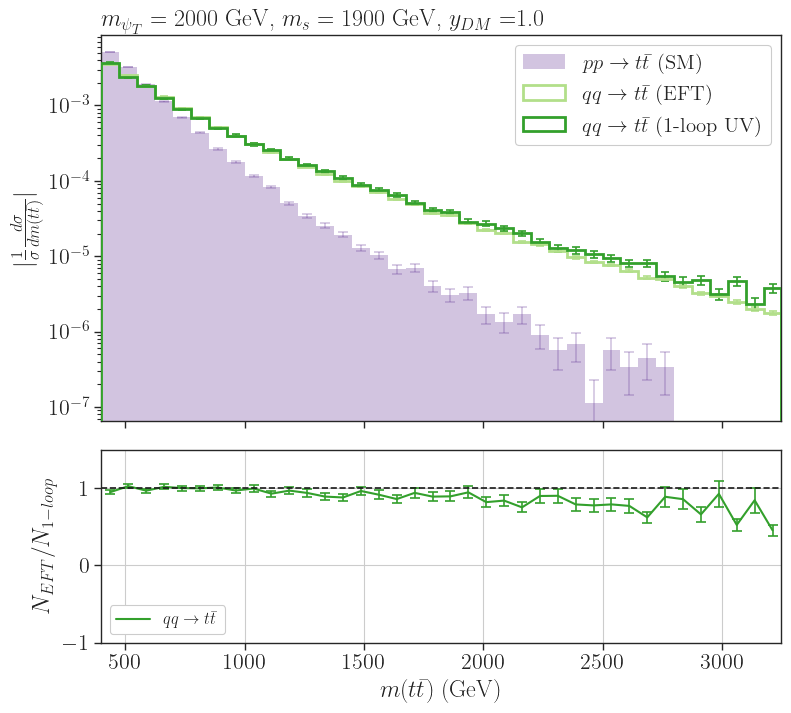

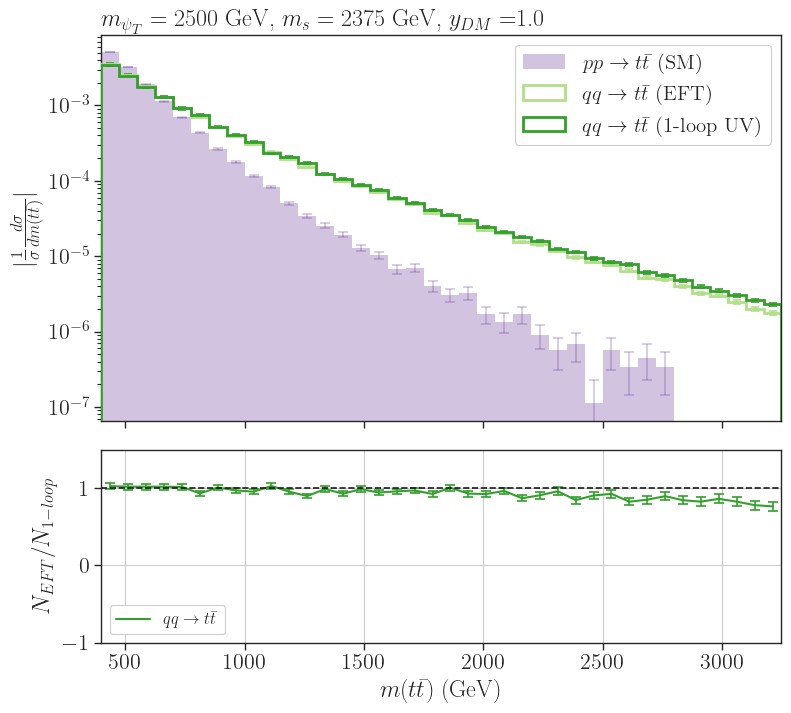

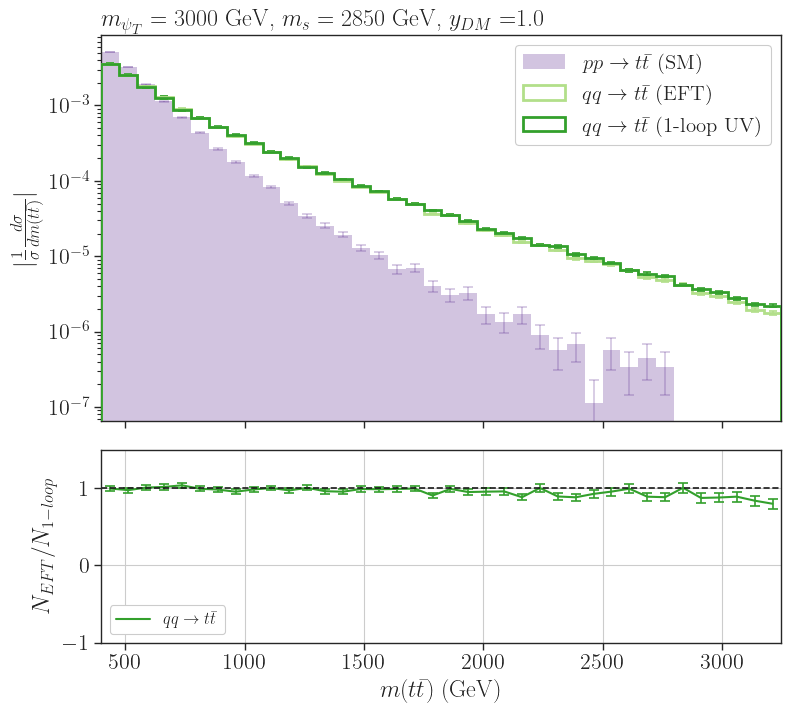

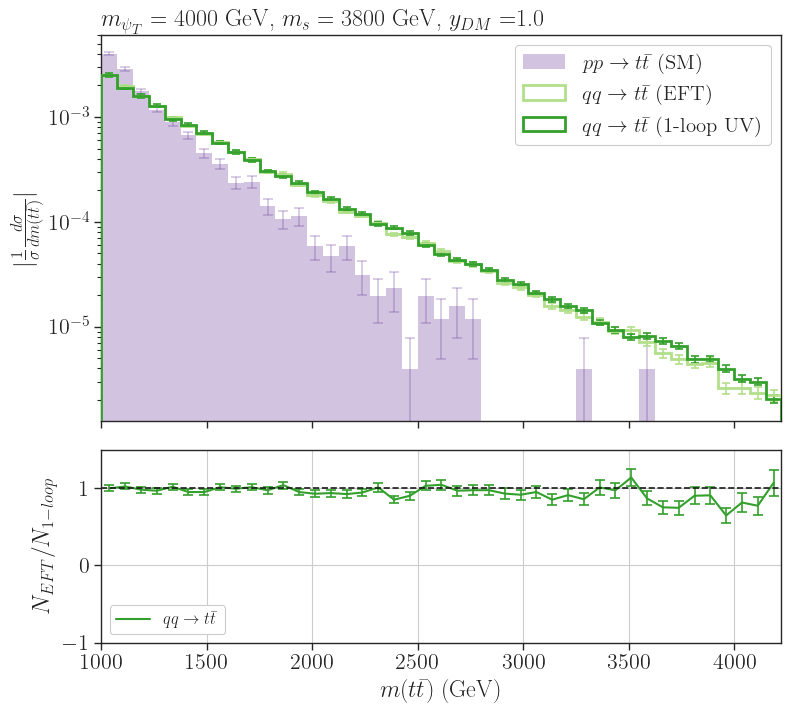

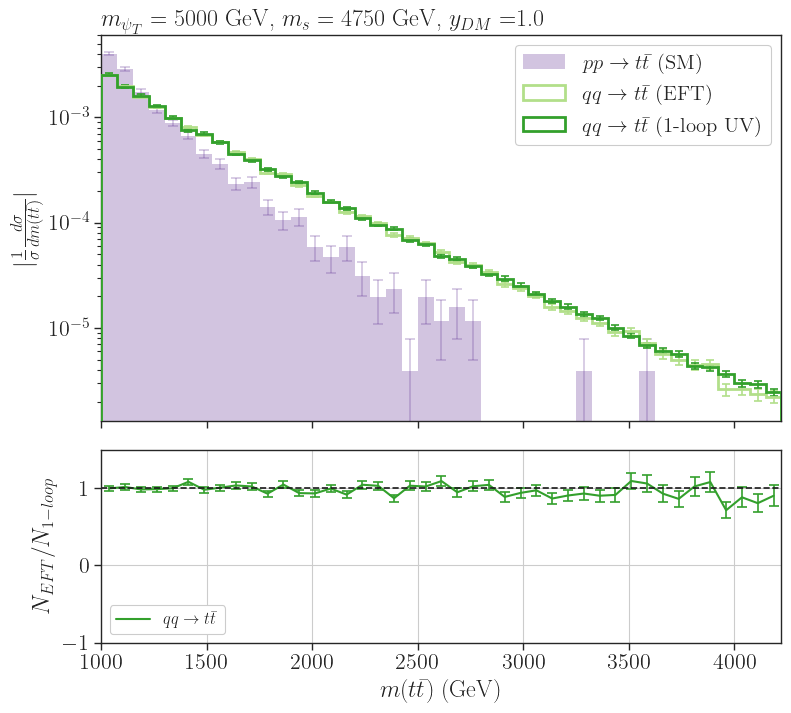

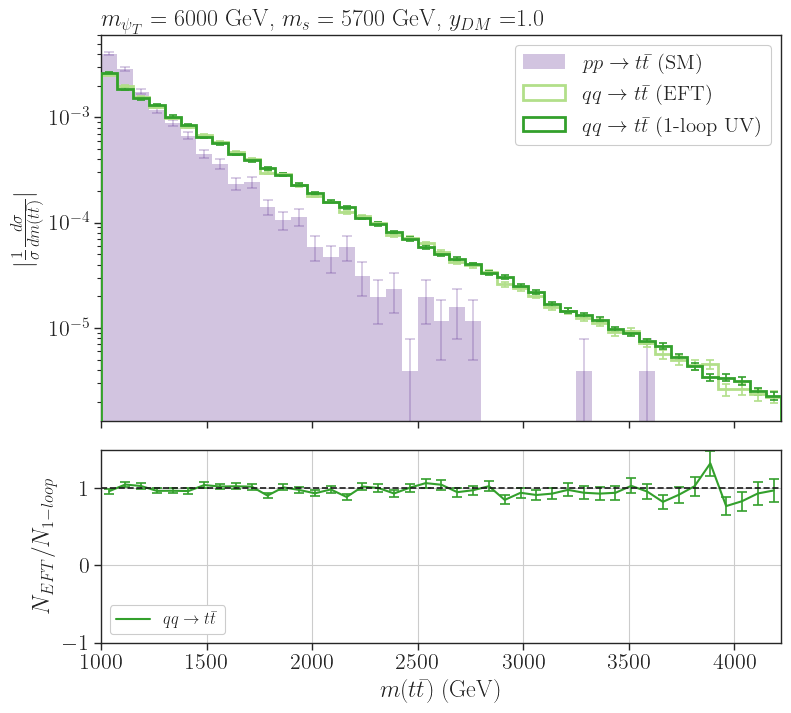

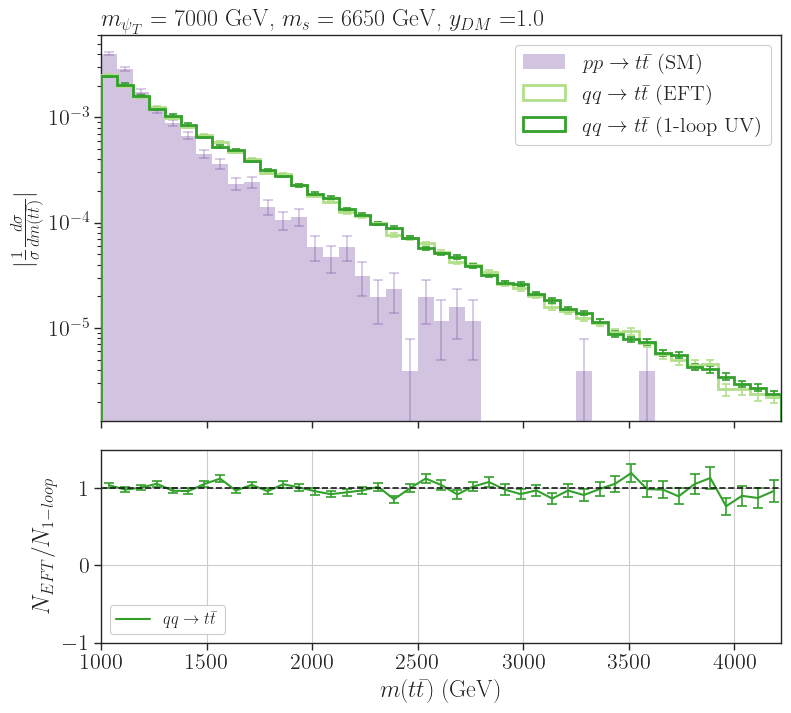

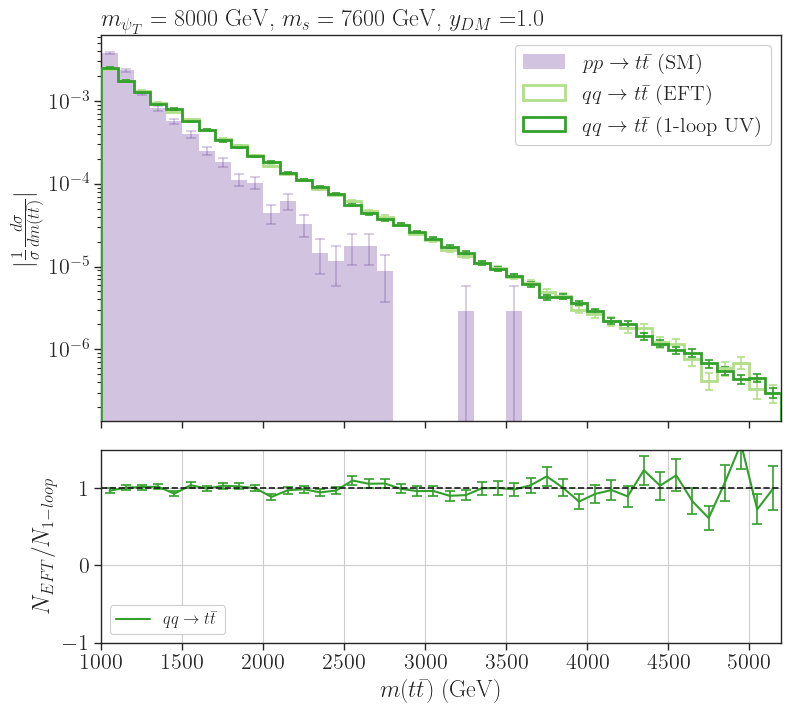

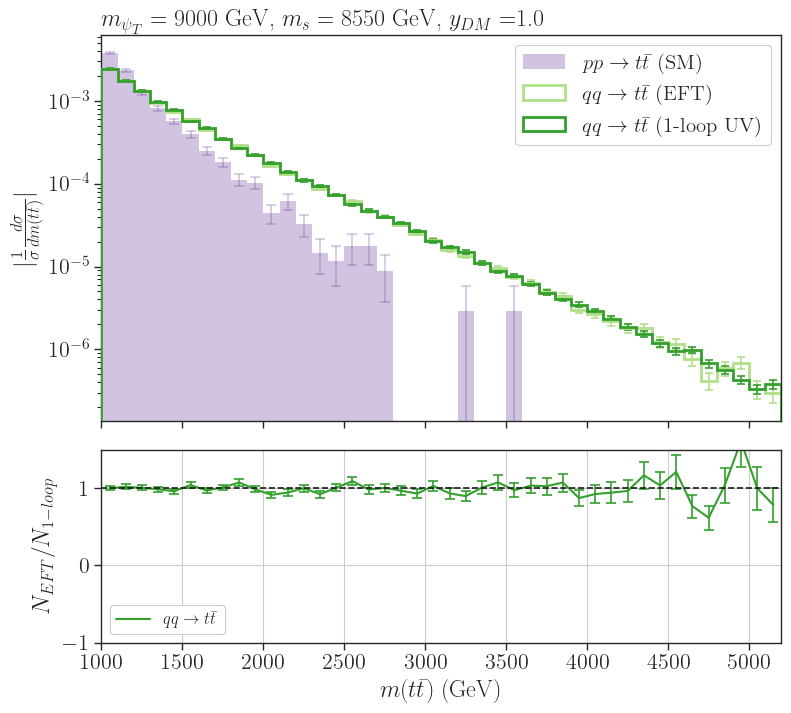

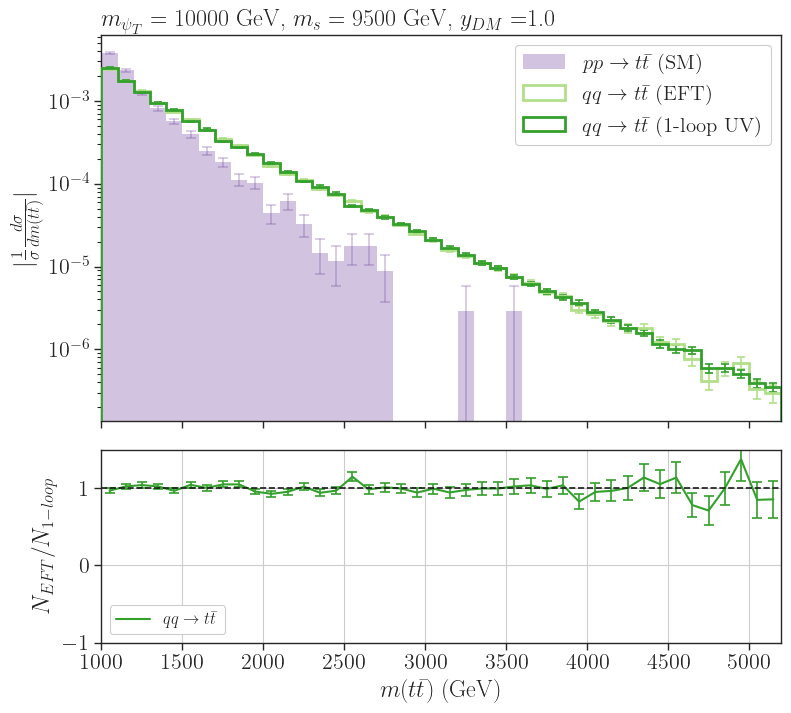

In [6]:
# Generating the BSM histograms and plotting them
# Coupling value
yDM = 1.0

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        bins = np.arange(400.,1550.,35.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,45.)
    elif mPsiT <=2000:
        bins = np.arange(400.,3300.,75.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,75.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,75.)
    else:
        bins = np.arange(1000.,5300.,100.)
    #Loop over the processes and models

    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    for d in data_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        if 'UV' in model:
            h,_ = np.histogram(d['mTT'],bins=bins,weights=17*d['weights'])
        else:
            h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        #h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(hists_sm[2]),label=labels_sm[2],bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    
    
    #Subplot configs
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
    
plt.show()

# $p_T$ $qq\to t\bar{t}$

In [8]:
#Generating the BSM histograms and plotting them
bins = np.arange(500.,2000.,75.)
# Coupling value
yDM = 1.0

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    mPsiT,mSDM = selected[0]['mass_params']
     #Defining the binning according to the BSM masses
    if mPsiT < 1250.:
        bins = np.arange(100.,1550.,50.)
    else:
        bins = np.arange(500.,2000.,75.)
        
    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    for d in data_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['pT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['pT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(hists_sm[2]),label=labels_sm[2],bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d['pT'],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['pT'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins,
                              color=c[j],alpha=1.0,histtype='step', density = True
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.power(hErr,2))/(sum(h)**2))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    
    #Subplot configs
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$p_T(t)$ (GeV)')
    
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3962129996.py, line 89)

# $\Delta\varphi$ $qq\to t\bar{t}$ 

In [ ]:
#Generating the numpy histogram for SM:
bins = np.arange(0,np.pi,0.5)

labels_sm = []
pmodels = []
hists_sm = []
histsErr_sm = []

for d in data_sm:
    process = d['process']
    model = d['model']
    weights = d['weights']
    pmodels.append(r'%s (%s)' %(process,model))
    label = pmodels[-1]
    labels_sm.append(label)
    h,_ = np.histogram(d['deltaPhi'],bins=bins,weights=d['weights'])
    hists_sm.append(h)
    #Compute MC error
    hErr,_ = np.histogram(d['deltaPhi'],bins=bins,weights=(d['weights'])**2)
    hErr = np.sqrt(hErr)    
    histsErr_sm.append(hErr)
    

print(labels_sm)

In [ ]:
#Generating the BSM histograms and plotting them
bins = np.arange(0,np.pi,0.5)
# Coupling value
yDM = 1.0

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []
    mPsiT,mSDM = selected[0]['mass_params']

    #Loop over the processes and models
    for j,d in enumerate(selected):
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h,_ = np.histogram(d['deltaPhi'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['deltaPhi'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins,
                          color=c[j],alpha=1.0,histtype='step',density=True,
                         linewidth=3,fill=False,zorder=i,linestyle='solid')
    #Plotting the SM hist
    axarr[0].hist(bins[:-1],weights=np.abs(hists_sm[2]),label=labels_sm[2],bins=bins,
                          color=sns.color_palette('Paired')[5],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')  

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[2:]
    hEFT = hists[:2]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$g g \to t \bar{t}$', r'$q q \to t \bar{t}$']
    for j,h in enumerate(hLoop):
        ratio = np.divide(hEFT[j]/sum(hEFT[j]) , h/sum(h), out=np.zeros_like(h),where=h != 0)
        #ratio = hEFT[j]- h
        # Remove zero values
        #nonzero = np.where((np.sign(ratio) != 0))
        x = (bins[:-1]+bins[1:])/2.0
        y = ratio
        label = labels_r[j]
        #Ratio plots
        axarr[1].plot(x,y,linewidth=3.0,linestyle='solid',alpha=1,
                              label=label,c=c[j])
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    
    #Subplot configs
    axarr[1].set_ylim(0.0,2)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='upper left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$p_T(t)$ (GeV)')
    
plt.show()